## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [1]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd

importlib.reload(main)
importlib.reload(popd)

import torchvision.transforms as transforms

## Variables

In [2]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [3]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 1m 32s
The preloaded images use 0.07039642333984375MB of memory


In [53]:
import random
import numpy as np

random_state=42

torch.manual_seed(random_state)
random.seed(random_state)
np.random.seed(random_state)

data_augmentation=transforms.Compose([
        transforms.ColorJitter(0.3, 0.3, 0.3, 0.3),
        #transforms.RandomRotation((-45, 45))
        #transforms.ColorJitter(0.5, 0.5, 0.5, 0.5),
        #transforms.RandomApply([transforms.RandomRotation((-20, 20))], p=0.2),
        #transforms.RandomEqualize(),
        transforms.RandomHorizontalFlip(p=0.5),
    ])

"""dataset = popd.PreloadedOnePartDataset(
    part,
    preloaded_images,
    data_augmentation=data_augmentation,
    class_to_augment=0,
    remove_not_visible=True,
    ignore_repair=True
)

for i in range(10):
    display(dataset[11][0])
"""

'dataset = popd.PreloadedOnePartDataset(\n    part,\n    preloaded_images,\n    data_augmentation=data_augmentation,\n    class_to_augment=0,\n    remove_not_visible=True,\n    ignore_repair=True\n)\n\nfor i in range(10):\n    display(dataset[11][0])\n'

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #490, 80.07%
Class: capot_roto, #122, 19.93%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #111, 81.02%
Class: capot_roto, #26, 18.98%
#TRAIN 612 #TEST 137
Epoch 0/39
----------
train Loss: 0.5142 Main metric (macro_f1): 0.4804 Time: 4.99s
test Loss: 0.4859 Main metric (macro_f1): 0.4476 Time: 0.45s
Epoch 1/39
----------
train Loss: 0.4865 Main metric (macro_f1): 0.4446 Time: 4.98s
test Loss: 0.4784 Main metric (macro_f1): 0.4476 Time: 0.45s
ES Module Best: 0.4784367713179902, BadEpochs: 0
Epoch 2/39
----------
train Loss: 0.4773 Main metric (macro_f1): 0.4446 Time: 4.99s
test Loss: 0.4705 Main metric (macro_f1): 0.4476 Time: 0.45s
ES Module Best: 0.47053068832759437, BadEpochs: 0
Epoch 3/39
----------
train Loss: 0.4605 Main metric (macro_f1): 0.4446 Time: 4.98s
test Loss: 0.4645 Main metric (macro_f1): 0.4476 Time: 0.46s
ES Module Best: 0.46451547785396996, BadEpochs: 0
Epoch 4/39
----------
train Loss: 0.4480

,class,precision,recall,f1
0,capot_roto,0.909091,0.384615,0.540541
1,capot_sano,0.873016,0.990991,0.928270


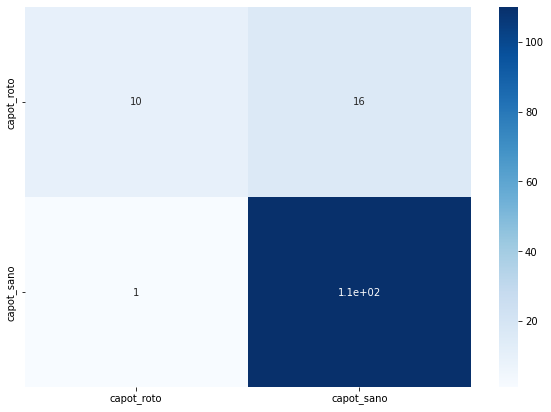

In [54]:
part = "Capot"
MODEL_NAME = "one_part_model-capot"
EXPERIMENT_NAME = "resnet50_capot_augment"

main.train_one_part_model_dataugment(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    ignore_repair=True,
    remove_not_visible=True,
    data_augmentation=data_augmentation,
    class_to_augment=0
)